# Exploratory data analysis, visualization, machine learning

- source-1: <https://kaggle-kr.tistory.com/17?category=868316>
- source-2: <https://kaggle-kr.tistory.com/18?category=868316>
- [Sklearn - Supervised learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [1]:
import zipfile
import warnings

# data
import numpy as np
import pandas as pd

import missingno as msno

# model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
warnings.filterwarnings("ignore")

plt.style.use("seaborn")
sns.set(font_scale=1.5)
py.init_notebook_mode(connected=True)

%matplotlib inline

데이터 확인: 결측값 확인 및 값 정제<br />
-> EDA: feature별 시각화, feature간 상관계수 **insight 얻기**<br />
-> feature engineering: 모델의 성능을 높이고자 재표현<br />
 &nbsp; &nbsp; &nbsp;ex. one-hot encoding, class로 나누기, 구간으로 나누기, text data processing<br />
-> make model: sklearn, tensorflow, pytorch and so on<br />
-> train & predict<br />
-> 평가 (alike inference): 문제에 따라 평가하는 방식도 달라짐.

### data

In [3]:
with zipfile.ZipFile("titanic.zip", "r") as zipf:
    with zipf.open("train.csv") as f:
        train = pd.read_csv(f)
    with zipf.open("test.csv") as f:
        test = pd.read_csv(f)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- id: PassengerId / Name
- Target: Survived (생존여부, integer)
- Explain: Pclass, Age, SibSp, Parch / (Sex, Ticket, Fare, Cabin, Embarked)

| Survived | 생존여부 | 0, 1 (boolean) | integer |
|:--------:|---------|--------------|---------|
| Pclass | 티켓의 클래스 | 1, 2, 3 / categorical | integer |
| sex | 성별 | male, female / binary | integer |
| Age | 나이 | continuous | integer |
| sibSp | 함께 탑승한 형제와 배우자의 수 | quantitative | integer |
| parch | 함께 탑승한 부모, 아이의 수 | quantitative | integer |
| ticket | 티켓 번호 | alphabet + integer | string |
| fare | 탑승료 | continuous | float |
| cabin | 객실 번호 | alphabet + integer | string |
| Embared | 탑승 항구 | C(Cherbourg), Q(Queenstown), S(Southampton) | string |

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


0값의 존재 확인

## 1. data check

### 1-1. Null check

In [9]:
for col in train.columns:
    msg = "column: {:>10}\t Percent of NaN value: {:.2f}%"\
          .format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [10]:
for col in test.columns:
    msg = "column: {:>10}\t Precent of NaN value: {:.2f}%"\
          .format(col, 100 * (test[col].isnull().sum() / test[col].shape[0]))
    print(msg)

column: PassengerId	 Precent of NaN value: 0.00%
column:     Pclass	 Precent of NaN value: 0.00%
column:       Name	 Precent of NaN value: 0.00%
column:        Sex	 Precent of NaN value: 0.00%
column:        Age	 Precent of NaN value: 20.57%
column:      SibSp	 Precent of NaN value: 0.00%
column:      Parch	 Precent of NaN value: 0.00%
column:     Ticket	 Precent of NaN value: 0.00%
column:       Fare	 Precent of NaN value: 0.24%
column:      Cabin	 Precent of NaN value: 78.23%
column:   Embarked	 Precent of NaN value: 0.00%


Age와 Cabin 데이터는 공통적으로 결측값이 있고, train의 Embarked에도 결측값이 있다.

<AxesSubplot:>

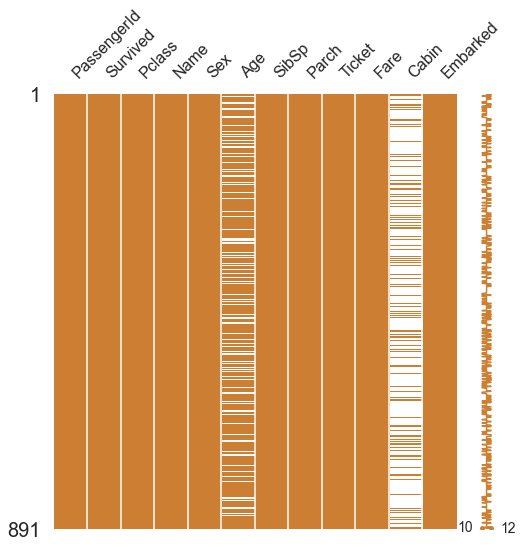

In [11]:
msno.matrix(train, figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

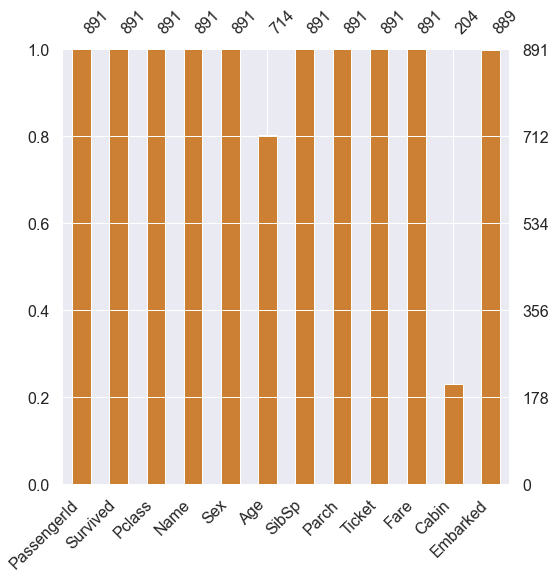

In [12]:
msno.bar(train, figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

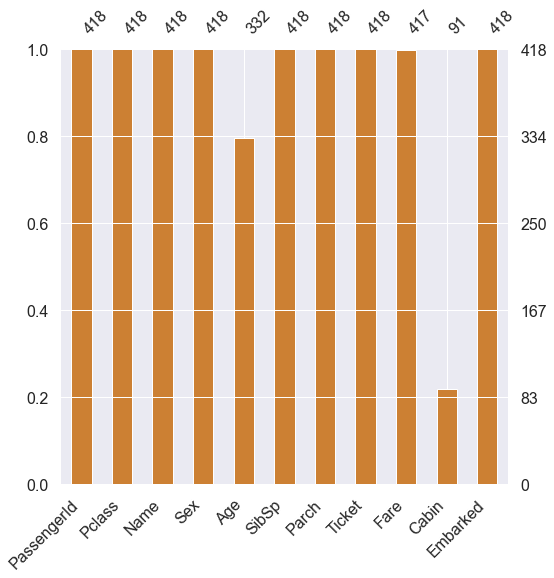

In [13]:
msno.bar(test, figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 1-2. Target label check

- Target distribution, 전반적인 형태와 분포 확인
- Survived(0, 1) -> Binary Classification

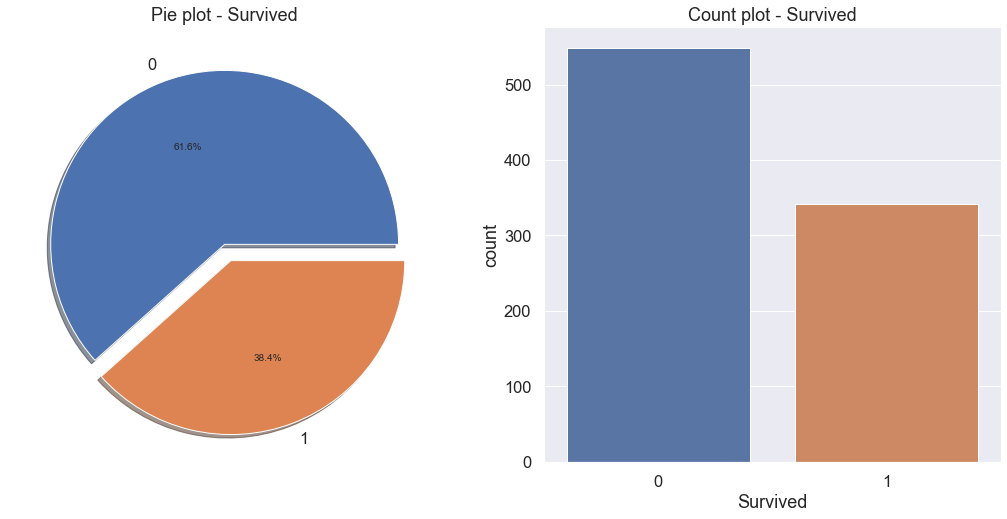

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

train["Survived"].value_counts().plot.pie(
    explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)

sns.countplot("Survived", data=train, ax=ax[1])

ax[0].set_ylabel("")
ax[0].set_title("Pie plot - Survived")

ax[1].set_title("Count plot - Survived")

plt.show()

수학적으로는 편향된 데이터이긴 한데, 경험적으로는 클래스에 대해서 불균형한 데이터는 아니라서 일단 그냥 진행하도록 한다.

## 2. Exploratory data analysis

- 데이터 안에 숨겨진 의미, 관계 찾기를 위한 feature 시각화

### 2-1. Pclass

- class를 integer로 취급했을 때, Pclass는 값이 클수록 사람이 많았다.
- 그리고 수가 많은만큼 생존하지 못한 비율도 높다.

In [15]:
# train.Pclass.value_counts()
train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).agg(["count", "sum", "mean"])

Survived               
          count  sum      mean
Pclass                        
1           216  136  0.629630
2           184   87  0.472826
3           491  119  0.242363

sample로 기록된 건 클래스별 216, 184, 491명인데, 이거는 단순히 Pclass에 대한 전체 명수이다.
- 그중에서 sum은 생존한 사람들의 명수
- mean은 클래스별 생존율로 해석될 수 있다.

In [16]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


앞선 클래스별 생존율을 색과 함께 표현한 것이다.

<AxesSubplot:xlabel='Pclass'>

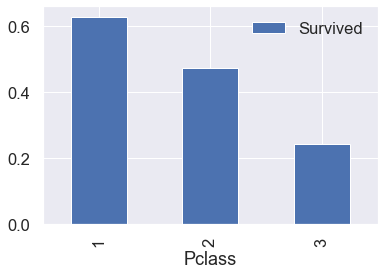

In [17]:
train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar()

앞서부터 계속 보였지만, Pclass를 integer로 생각했을 때 수가 적을수록 생존율이 높다.

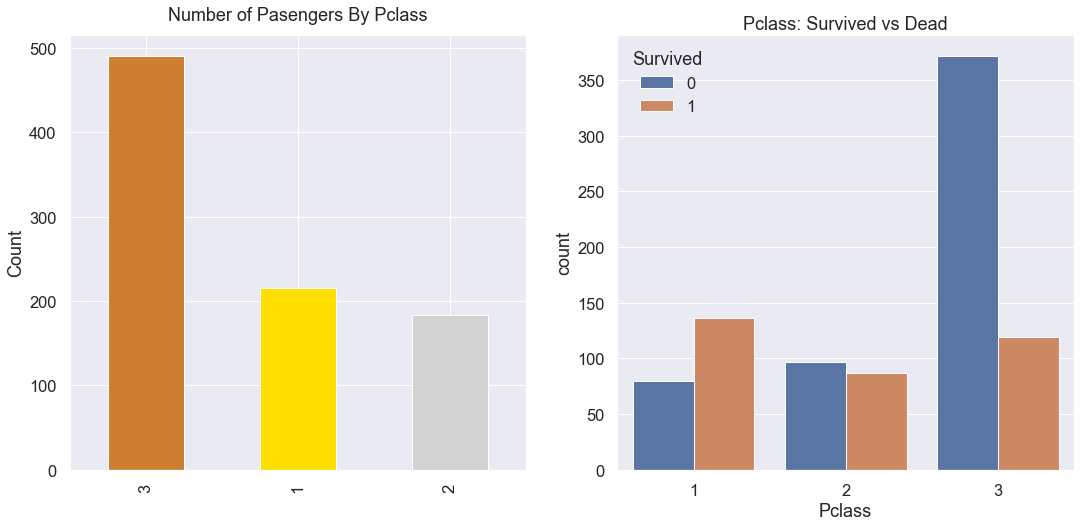

In [18]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

train.Pclass.value_counts().plot.bar(color=["#CD7F32", "#FFDF00", "#D3D3D3"], ax=ax[0])
sns.countplot("Pclass", hue="Survived", data=train, ax=ax[1])

ax[0].set_ylabel("Count")
ax[0].set_title("Number of Pasengers By Pclass", y=y_position)

ax[1].set_title("Pclass: Survived vs Dead")

plt.show()

- class를 integer로 취급했을 때, Pclass는 값이 클수록 사람이 많았다.
- 그리고 수가 많은만큼 생존하지 못한 비율도 높다.

### 2-2. Sex

<!-- - 성별은 한다고 안 했는데 -->
- 전체적인 수는 남자가 200명 정도 많다.
- 여성이 절반 이상 생존한 것에 비해 남성은 여성 생존수의 반도 살아남지 못했다.

In [19]:
pd.crosstab(train.Sex, train.Survived, margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


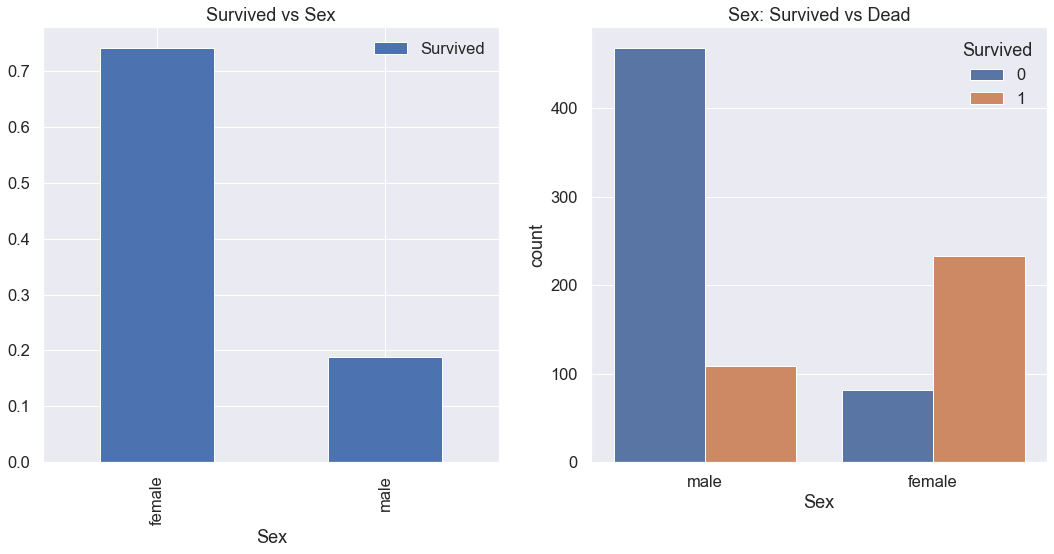

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

train[["Sex", "Survived"]].groupby(["Sex"], as_index=True).mean().plot.bar(ax=ax[0])
sns.countplot("Sex", hue="Survived", data=train, ax=ax[1])

ax[0].set_title("Survived vs Sex")
ax[1].set_title("Sex: Survived vs Dead")

plt.show()

- 전체적인 수는 남자가 200명 정도 많다.
- 여성이 절반 이상 생존한 것에 비해 남성은 여성 생존수의 반도 살아남지 못했다.

### 2-3. Both Sex and Pclass

- Sex와 Pclass는 관계성이 적은 것 같다.

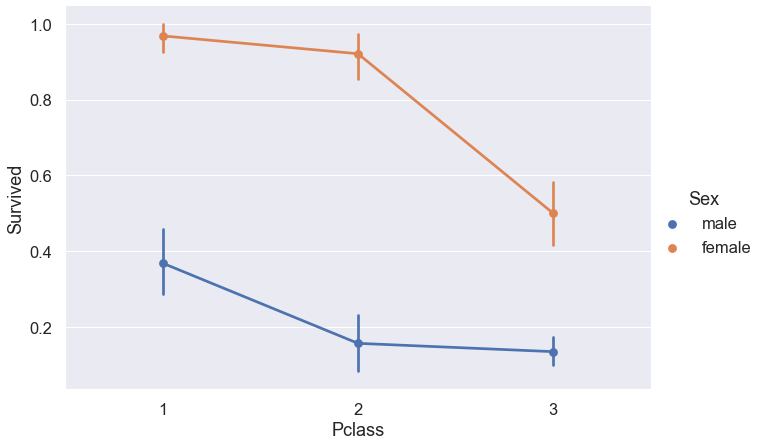

In [21]:
sns.factorplot("Pclass", "Survived", hue="Sex", data=train, size=6, aspect=1.5)

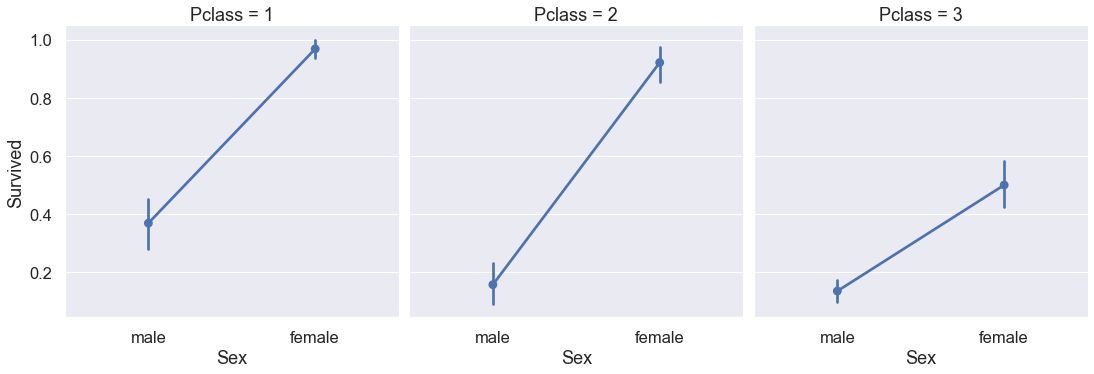

In [22]:
sns.factorplot("Sex", "Survived", col="Pclass", data=train)

<!-- 곡선까지 섬세하게 확인할 게 아니니까 -->
다행히 Sex와 Pclass는 관계성이 적은 것 같다. 생존율은 Pclass 전반에 걸쳐 여성이 높고, Pclass integer가 작을수록 높다.

### 2-4. Age

- 나이가 어릴수록 생존율이 높다.

In [23]:
print("제일 나이가 어려요: {:.1f} years".format(train.Age.min()),
      "제일 나이가 많아요: {:.1f} years".format(train.Age.max()),
      "평균 나이는 이래요: {:.1f} years".format(train.Age.mean()), sep="\n")

제일 나이가 어려요: 0.4 years
제일 나이가 많아요: 80.0 years
평균 나이는 이래요: 29.7 years


In [24]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

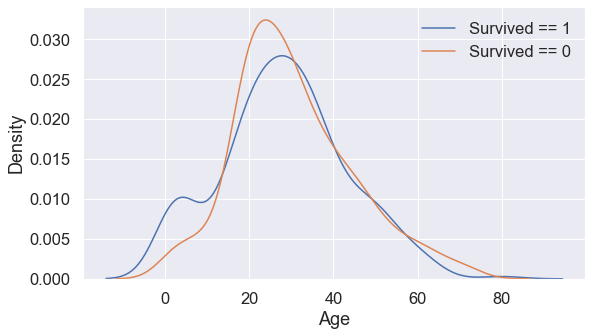

In [25]:
plt.figure(figsize=(9, 5))
sns.kdeplot(train[train["Survived"] == 1].Age, label="Survived == 1")
sns.kdeplot(train[train["Survived"] == 0].Age, label="Survived == 0")

# plt.legend(["Survived == 1", "Survived == 0"])
plt.legend(loc="best")
plt.show()

그림으로만 보면 나이와 생존여부는 크게 관련이 없어 보이는데, insight가 안 생기는데.

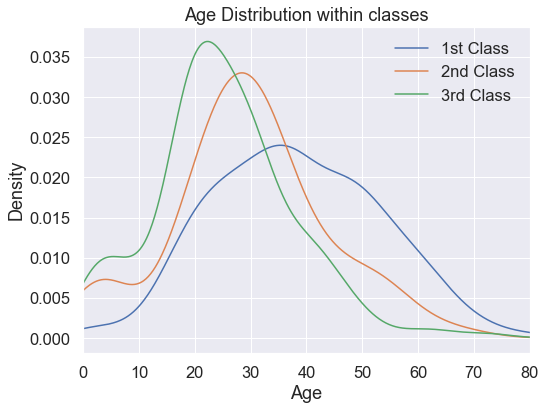

In [26]:
plt.figure(figsize=(8, 6))

train.Age[train.Pclass == 1].plot(kind="kde", label="1st Class")
train.Age[train.Pclass == 2].plot(kind="kde", label="2nd Class")
train.Age[train.Pclass == 3].plot(kind="kde", label="3rd Class")

plt.xlim(0, train.Age.max())
plt.legend(loc="best")
# plt.legend(["1st Class", "2nd Class", "3rd Class"])
plt.xlabel("Age")
plt.title("Age Distribution within classes")

plt.show()

Pclass integer가 높을수록 탑승객의 나이 평균 또한 커졌다.

In [27]:
cum_survival_ratio = []
for i in range(1, int(train.Age.max()) + 1):
    temp = train[train.Age < i].Survived
    cum_survival_ratio.append(temp.sum() / len(temp))

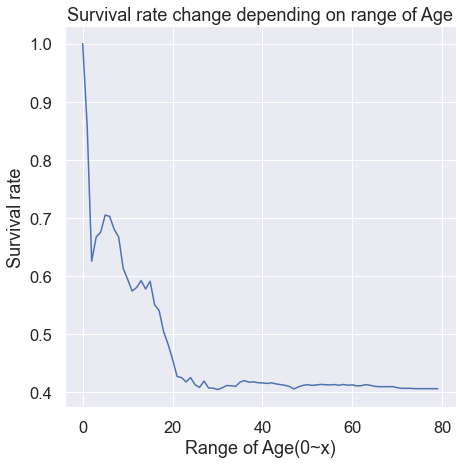

In [28]:
plt.figure(figsize=(7, 7))
plt.plot(cum_survival_ratio)

plt.xlabel("Range of Age(0~x)")
plt.ylabel("Survival rate")
plt.title("Survival rate change depending on range of Age")

plt.show()

- 1 ~ max를 돌면서 현재 step 값보다 작은 값들에 대한 비율을 구한 것.
- 나이가 어릴수록 생존율이 높다.

### 2-5. Pclass, Sex, Age

- 나이가 어릴수록, 여성일수록, Pclass가 높은 사람일수록 생존율이 높았다.

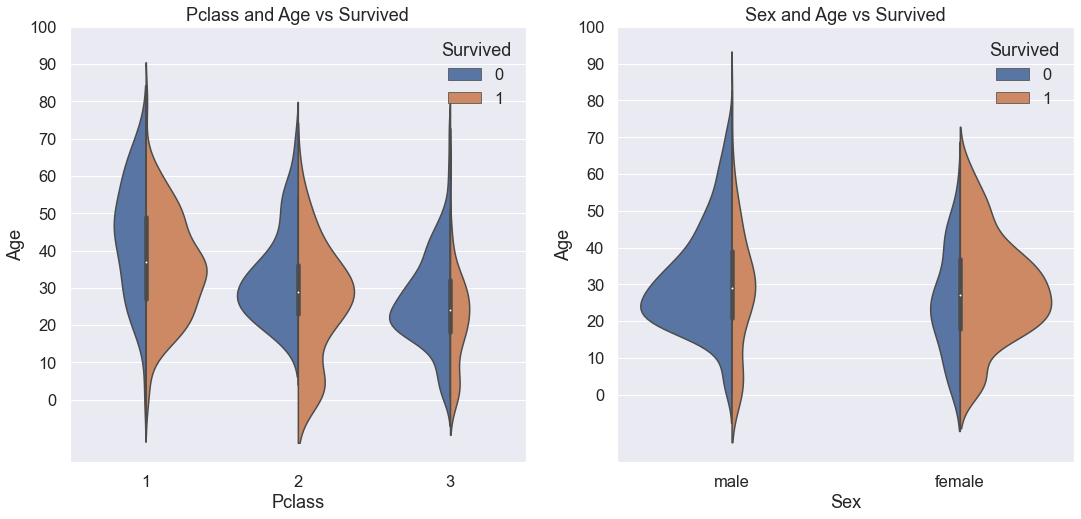

In [29]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot("Pclass", "Age", hue="Survived", data=train, scale="count", split=True, ax=ax[0])
sns.violinplot("Sex", "Age", hue="Survived", data=train, scale="count", split=True, ax=ax[1])

for i in range(2):
    ax[i].set_yticks(range(0, 110, 10))

ax[0].set_title("Pclass and Age vs Survived")
ax[1].set_title("Sex and Age vs Survived")

plt.show()

나이가 어릴수록, 여성일수록, Pclass가 높은 사람일수록 생존율이 높았다.

### 2-6. Embarked

- class는 S가 사람이 제일 많다.
- S는 남성 비율이 여성의 2배보다 높다. 그거 빼곤 성별 비율은 비슷하고 대체로 비슷
- class C만 생존율이 0.5보다 크다.
- S가 대중적인 항구고, C는 아는 사람만 아는 항군가? Q는 도심에서 떨어진 데 있나?

<AxesSubplot:xlabel='Embarked'>

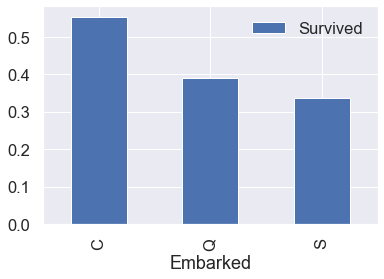

In [30]:
train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar()

Embarked별 생존율의 차이가 있다. 탑승항구가 C일 때 생존율이 높다.
- Embarked가 새로운 변수로 유용하거나
- 여성이 많이 탔거나 Pclass integer가 적은 사람이 많이 탔거나.

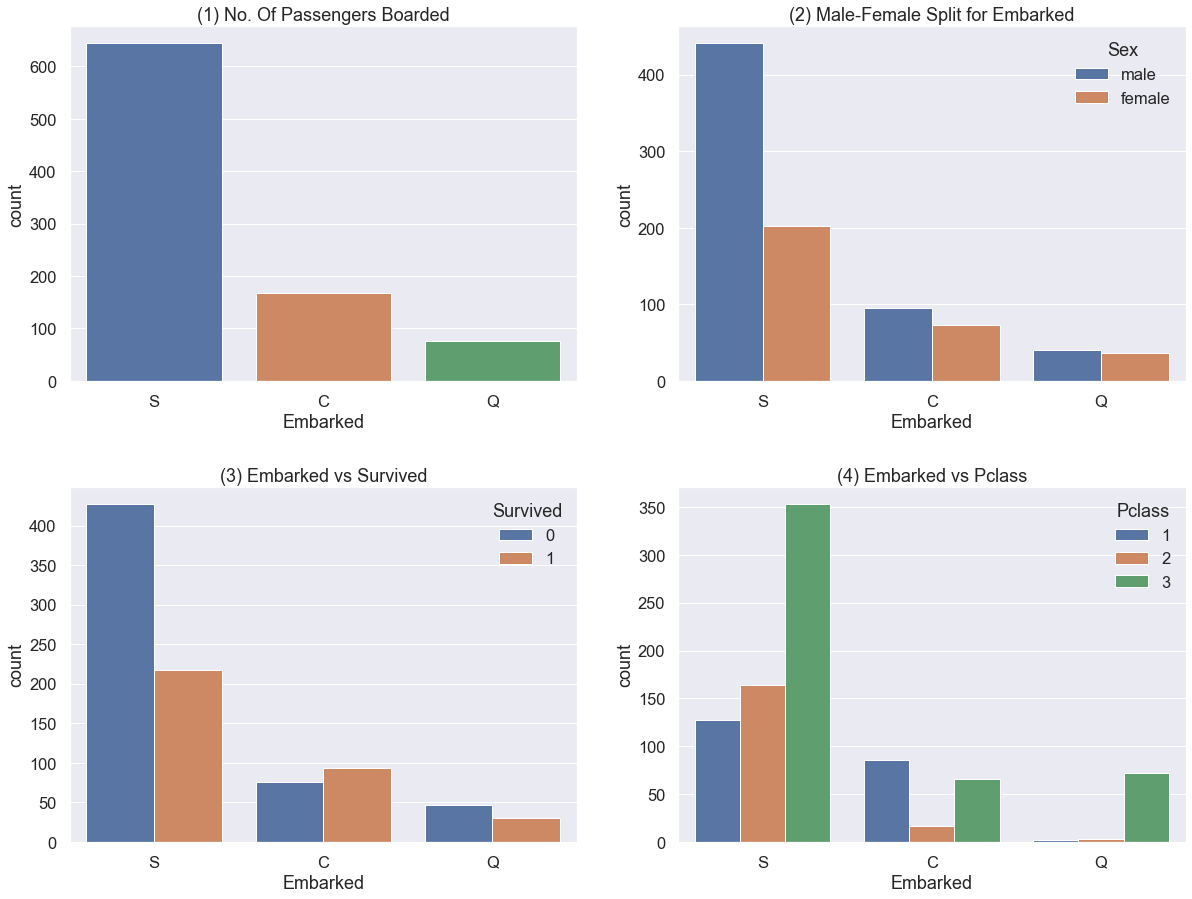

In [31]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot("Embarked", data=train, ax=ax[0, 0])
sns.countplot("Embarked", hue="Sex", data=train, ax=ax[0, 1])
sns.countplot("Embarked", hue="Survived", data=train, ax=ax[1, 0])
sns.countplot("Embarked", hue="Pclass", data=train, ax=ax[1, 1])

ax[0, 0].set_title("(1) No. Of Passengers Boarded")
ax[0, 1].set_title("(2) Male-Female Split for Embarked")
ax[1, 0].set_title("(3) Embarked vs Survived")
ax[1, 1].set_title("(4) Embarked vs Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

Embarked

- class는 S가 사람이 제일 많다. S는 남성 비율이 여성의 2배보다 높다.
- 성별 비율은 비슷하고
- class C만 생존율이 0.5보다 크다.
- S가 대중적인 항구고, C는 아는 사람만 아는 항군가? Q는 도심에서 떨어진 데 있나?

### 2-7. Family - SibSp(형제 자매) + Parch(부모, 자녀)

- 혼자 탄 사람들이 많았다.
- 4, 3, 2, 7, 1로 혼자 탔을 때보다 가족이랑 탔을 때 생존율이 높았다.
- 아무래도 가족단위가 여성 비율이나 어린 가족의 비율이 높았기 때문이겠지.

In [32]:
train["FamilySize"] = train.SibSp + train.Parch + 1
test["FamilySize"] = test.SibSp + test.Parch + 1

In [33]:
print(f"Family size max: {train.FamilySize.max()}",
      f"Family size min: {train.FamilySize.min()}", sep="\n")

Family size max: 11
Family size min: 1


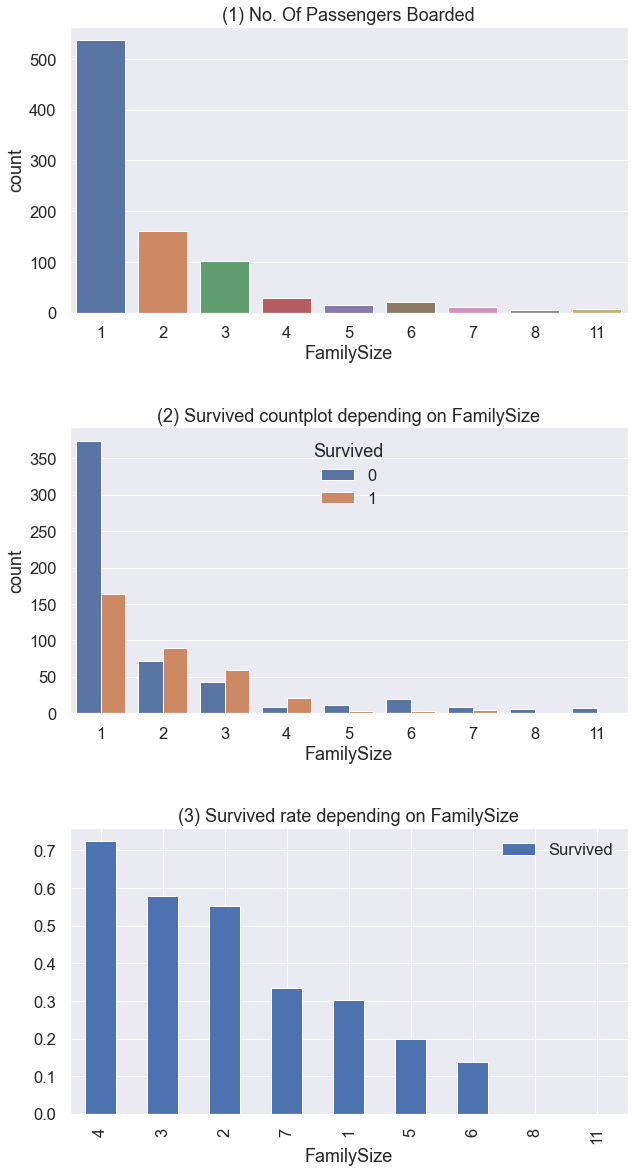

In [34]:
f, ax = plt.subplots(3, 1, figsize=(10, 20))

sns.countplot("FamilySize", data=train, ax=ax[0])
sns.countplot("FamilySize", hue="Survived", data=train, ax=ax[1])
train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar(ax=ax[2])

ax[0].set_title("(1) No. Of Passengers Boarded")
ax[1].set_title("(2) Survived countplot depending on FamilySize")
ax[2].set_title("(3) Survived rate depending on FamilySize")

plt.subplots_adjust(hspace=0.4)
plt.show()

- 혼자 탄 사람들이 많았다.
- 4, 3, 2, 7, 1로 혼자 탔을 때보다 가족이랑 탔을 때 생존율이 높았다.
- 아무래도 가족단위가 여성 비율이나 어린 가족의 비율이 높았기 때문이겠지.

### 2-8. Fare

- 재표현의 사다리에서 log는 오른쪽으로 꼬리가 긴 걸 완화하는 역할을 한다.
- 원래 여기서 하는 거 아님 (feature engineering에서 하는 것)

In [35]:
train.loc[train.Fare.isnull(), "Fare"]

Series([], Name: Fare, dtype: float64)

In [36]:
test.loc[test.Fare.isnull(), "Fare"]

152   NaN
Name: Fare, dtype: float64

In [37]:
test.loc[test.Fare.isnull(), "Fare"] = test.Fare.mean()

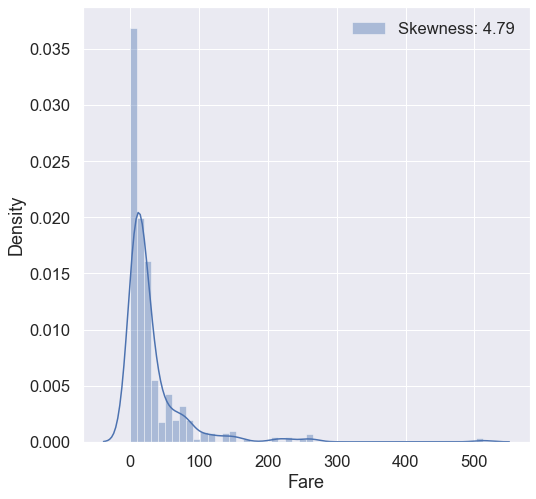

In [38]:
plt.figure(figsize=(8, 8))
sns.distplot(train.Fare, color="b", label="Skewness: {:.2f}".format(train.Fare.skew()))
plt.legend(loc="best")
plt.show()

비대칭이긴 한데, 이건 로얄석을 산 사람들 때문 아닌가?

In [39]:
train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
test["Fare"] = test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

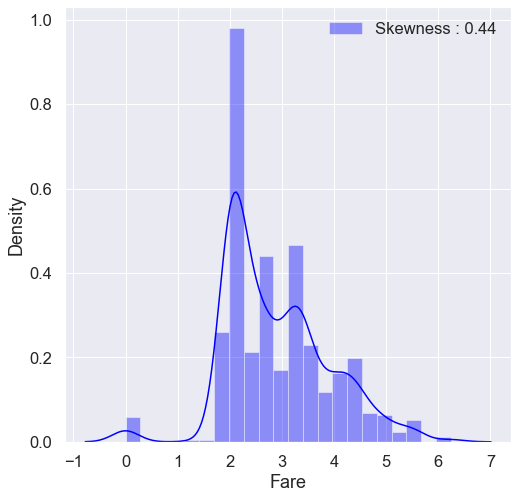

In [40]:
plt.figure(figsize=(8, 8))
sns.distplot(train["Fare"], color="blue", label="Skewness : {:.2f}".format(train.Fare.skew()))
plt.legend(loc="best")
plt.show()

상당히 잘 되긴 했는데, 0.44면 무시할 수 있을만한 수준이긴 한데

### 2-9. Cabin

- 결측치가 많아 일단 제외

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


### 2-10. Ticket

- 이용하려면 해당 내용에 대한 직관 필요

## 3. Feature engineering

### 3-1. Fill Null

#### 3-1-1. Fill Null in Age using title

In [42]:
train["Initial"] = train.Name.str.extract("([A-Za-z]+)\.")
test["Initial"] = test.Name.str.extract("([A-Za-z]+)\.")

In [43]:
pd.crosstab(train.Initial, train.Sex).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [44]:
train["Initial"].replace(
    ["Mlle", "Mme", "Ms", "Dr", "Major", "Lady", "Countess", "Jonkheer",
        "Col", "Rev", "Capt", "Sir", "Don", "Dona"],
    ["Miss", "Miss", "Miss", "Mr", "Mr", "Mrs", "Mrs", "Other",
        "Other", "Other", "Mr", "Mr", "Mr", "Mr"], inplace=True)
test["Initial"].replace(
    ["Mlle", "Mme", "Ms", "Dr", "Major", "Lady", "Countess", "Jonkheer",
        "Col", "Rev", "Capt", "Sir", "Don", "Dona"],
    ["Miss", "Miss", "Miss", "Mr", "Mr", "Mrs", "Mrs", "Other",
        "Other", "Other", "Mr", "Mr", "Mr", "Mr"], inplace=True)

In [45]:
train.groupby("Initial")["Survived"].mean().sort_values()

Initial
Other     0.111111
Mr        0.162571
Master    0.575000
Miss      0.704301
Mrs       0.795276
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Initial'>

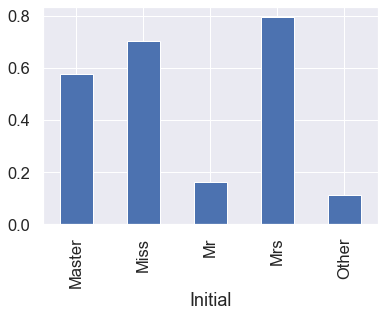

In [46]:
train.groupby("Initial")["Survived"].mean().plot.bar()

여성을 지칭하는 말인 Miss, Mrs 쪽의 생존율이 높다.<br />
여기서 해야 할 일은 해당 그래프를 보는 것이 아니라 Null data를 어떻게 채워넣을 것인가이다.

통계량을 사용하는 방법도 있고, 값을 유추하는 모델을 적합하는 방식도 있다. 그러나 여기서는 간단하게 통계량(평균)을 이용하는 방법을 이용할 것이다.

In [47]:
def placeValue(data, column, compare_column, category, value):
    assert data.ndim == 2
    data.loc[data[column].isnull() & (train[compare_column] == category), column] = value
    return data

In [48]:
for c in ["Mr", "Mrs", "Master", "Miss", "Other"]:
    temp = int(round(train.loc[train.Initial == c, "Age"].mean(), 0))
    train = placeValue(train, "Age", "Initial", c, temp)
    test = placeValue(test, "Age", "Initial", c, temp)

In [49]:
train.Age.isnull().sum() + test.Age.isnull().sum()

0

#### 3-1-2. Fill Null in Embarked

In [50]:
print("Embarked has", train.Embarked.isnull().sum(), "Null values")

Embarked has 2 Null values


여긴 다른 feature와의 insight가 없었나봄. 그냥 S로 채움.

In [51]:
train.Embarked.fillna("S", inplace=True)

### 3-2. Change Age (continuous to categorical)

- 연속형을 범주형으로 바꾸는 건 몇 가지 사전지식이 필요함. 나이가 범주형이어도 영향을 주지 않거나 범주형인 것이 보통이거나.
<!-- - 그러나 여기는 소개를 목적으로 하기에 한다고. -->

#### 첫번째

In [52]:
train["Age_cat"] = 0
for i in range(8):
    train.loc[(i * 10 <= train.Age) & (train.Age < (i + 1) * 10), "Age_cat"] = i
train.loc[70 <= train.Age, "Age_cat"] = 7

In [53]:
test["Age_cat"] = 0
for i in range(8):
    test.loc[(i * 10 <= test.Age) & (test.Age < (i + 1) * 10), "Age_cat"] = i
test.loc[70 <= test.Age, "Age_cat"] = 7

#### 두번째

In [54]:
def category_age(x):
    return int(x // 10) if x < 80 else 7

In [55]:
train["Age_cat2"] = train["Age"].apply(category_age)

#### 확인 후 마무리

In [56]:
(train["Age_cat"] == train["Age_cat2"]).all()

True

In [57]:
train.drop(["Age", "Age_cat2"], axis=1, inplace=True)
test.drop(["Age"], axis=1, inplace=True)

### 3-3. Change Initial, Embarked and Sex (string to numerical)

- categorical

In [58]:
train["Initial"] = train["Initial"].map({"Master": 0, "Miss": 1, "Mr": 2, "Mrs": 3, "Other": 4})
test["Initial"] = test["Initial"].map({"Master": 0, "Miss": 1, "Mr":2, "Mrs": 3, "Other": 4})

In [59]:
train["Embarked"] = train["Embarked"].map({"C": 0, "Q": 1, "S": 2})
test["Embarked"] = test["Embarked"].map({"C": 0, "Q": 1, "S": 2})

In [60]:
train.Embarked.isnull().any()

False

In [61]:
train["Sex"] = train["Sex"].map({"female": 0, "male": 1})
test["Sex"] = test["Sex"].map({"female": 0, "male": 1})

#### Correlation Matrix *R*

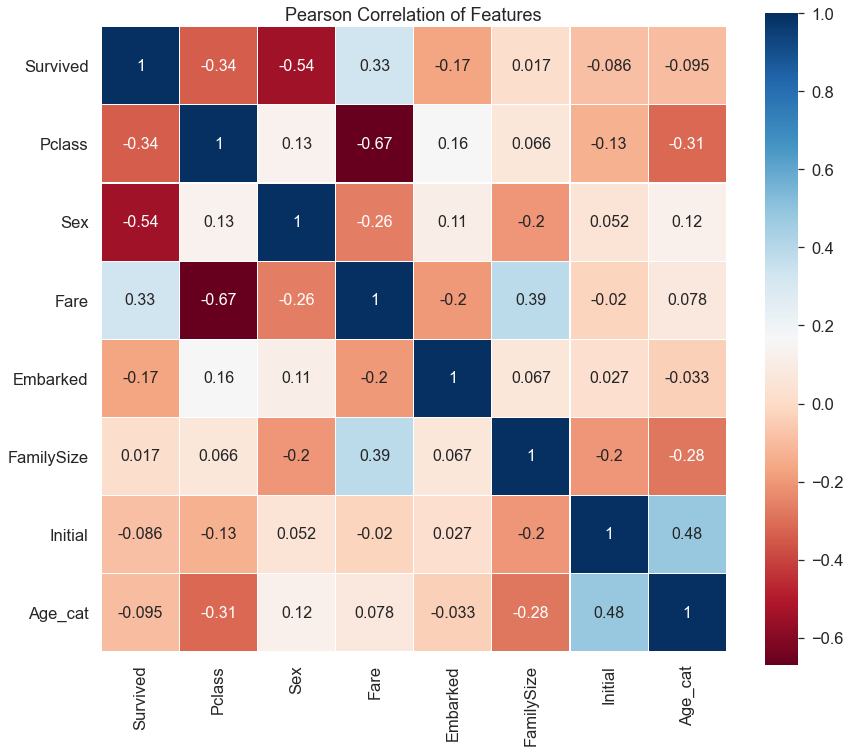

In [62]:
heatmap_data = train[["Survived", "Pclass", "Sex", "Fare", "Embarked", "FamilySize", "Initial", "Age_cat"]]

plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=.1, vmax=1., square=True,
    cmap=plt.cm.RdBu, linecolor="white", annot=True, annot_kws={"size": 16})
plt.title("Pearson Correlation of Features")
plt.show()

del heatmap_data

간만에 본 상관계수 행렬의 시각화는 크게 재밌는 결과를 보여주지 않았다.<br />
앞선 결과에서 알게 된 것들만 명심하자.

### 3-4. One-hot encoding on Initial and Embarked

- Initial에 대한 One-hot encoding 하지 않았나?

In [63]:
train = pd.get_dummies(train, columns=["Initial"], prefix="Initial")
test = pd.get_dummies(test, columns=["Initial"], prefix="Initial")

In [64]:
train = pd.get_dummies(train, columns=["Embarked"], prefix="Embarked")
test = pd.get_dummies(test, columns=["Embarked"], prefix="Embarked")

In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


가변수를 이용하는 방식.<br />
그러나 통계에서 이야기하는 가변수와는 느낌이 다르다. 왜냐하면 기준점을 두지 않기 때문이다.

### 3-5. Drop columns

In [66]:
train.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin"], axis=1, inplace=True)
test.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin"], axis=1, inplace=True)

In [67]:
train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


## 4. Building macine learning model and prediction using the trained model

### 4-1. Preparation - Split dataset into train, valid, test set

In [68]:
train_X = train.drop("Survived", axis=1).values
train_Y = train.Survived.values

In [69]:
test_X = test.values

In [70]:
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=.3, random_state=2018)

### 4-2. Model generation and prediction

Random Forest Classifier

- n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf etc.

In [71]:
model = RandomForestClassifier()

In [72]:
model.fit(train_X, train_Y)

RandomForestClassifier()

In [73]:
prediction = model.predict(valid_X)

In [74]:
print("총 {}명 중 {:.2f}% 정확도로 생존을 맞췄다".format(valid_Y.shape[0], 100 * metrics.accuracy_score(prediction, valid_Y)))

총 268명 중 83.21% 정확도로 생존을 맞췄다


### 4-3. Feature importance

In [75]:
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=test.columns)

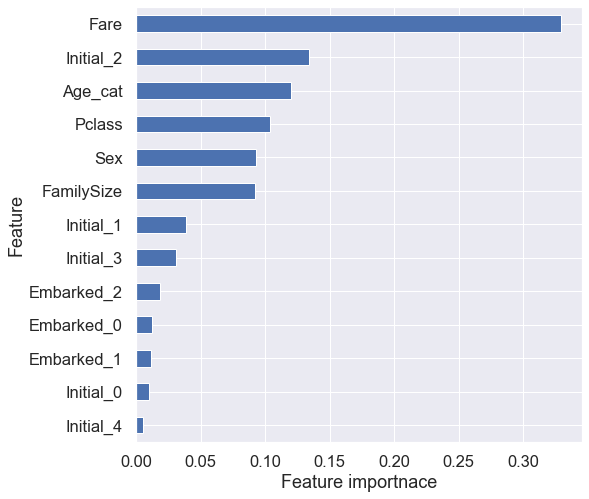

In [76]:
plt.figure(figsize=(8, 8))
feat_imp.sort_values(ascending=True).plot.barh()

plt.xlabel("Feature importnace")
plt.ylabel("Feature")
plt.show()

Fare의 영향력 장난 아니다. 선형 상관계수는 나이랑 성별이었던 것 같은데, 저건 n차 상관이 있나봄.

### 4-4. Prediction on Test set

In [ ]:
with zipfile.ZipFile("titanic.zip", "r") as zipf:
    with zipf.open("gender_submission.csv") as f:
        submission = pd.read_csv(f)

In [ ]:
submission.head()

In [ ]:
prediction = model.predict(test_X)
submission["Survived"] = prediction

In [ ]:
submission.to_csv("titanic_submission", index=False)

## 5. Concolusion